In [21]:
import os
os.chdir('./')
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
def est_nom_fichier_valide(nom, nom_fichier, n):
    return nom_fichier.startswith(nom + str(n) +'_') and nom_fichier.endswith('.json')

def recup_data(nom, dossier, values):
    donnees_json = []
    for n in values:
        donnees_json.append([])
        for nom_fichier in os.listdir(dossier):
            chemin_fichier = os.path.join(dossier, nom_fichier)
            if os.path.isfile(chemin_fichier) and est_nom_fichier_valide(nom, nom_fichier, n):
                # Lire le fichier JSON
                with open(chemin_fichier, 'r') as fichier:
                    donnees = json.load(fichier)
                    donnees_json[-1]+=donnees      
    groupe=[]
    valeur=[]
    for i in range(len(values)):
        groupe+=[values[i]]*len(donnees_json[i])
        valeur+=donnees_json[i]
    # Créez un DataFrame exemple
    donnees = {
        'Groupe': groupe,
        'Valeur': valeur
    }            
    return donnees

## Result on Adult

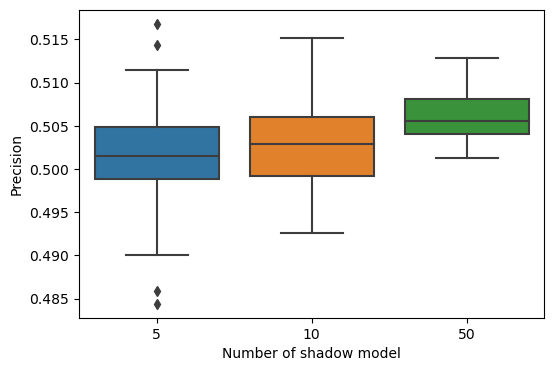

In [23]:
donnees=recup_data('report_shadow_model_', './adult/data', [5,10,20,50])
for i in range(len(donnees['Valeur'])):
    donnees['Valeur'][i]=donnees['Valeur'][i]['weighted avg']['precision']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('')
plt.xlabel('Number of shadow model')
plt.ylabel('Precision')
plt.show()

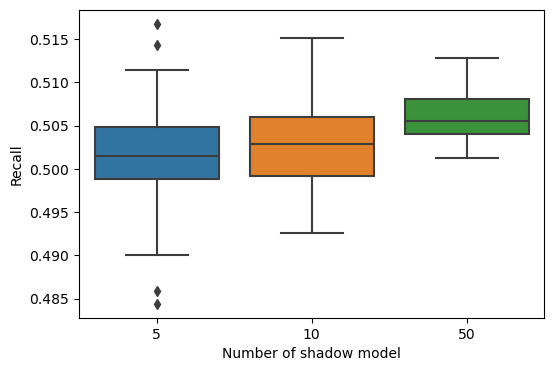

In [24]:
donnees=recup_data('report_shadow_model_', './adult/data', [5,10,20,50])
for i in range(len(donnees['Valeur'])):
    donnees['Valeur'][i]=donnees['Valeur'][i]['weighted avg']['recall']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('')
plt.xlabel('Number of shadow model')
plt.ylabel('Recall')
plt.show()

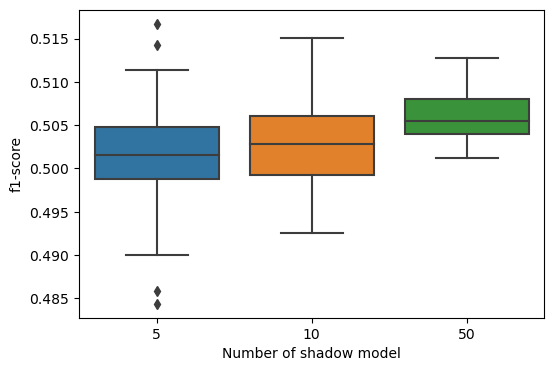

In [25]:
donnees=recup_data('report_shadow_model_', './adult/data', [5,10,20,50])
for i in range(len(donnees['Valeur'])):
    donnees['Valeur'][i]=donnees['Valeur'][i]['weighted avg']['f1-score']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('')
plt.xlabel('Number of shadow model')
plt.ylabel('f1-score')
plt.show()

## Result on MNIST

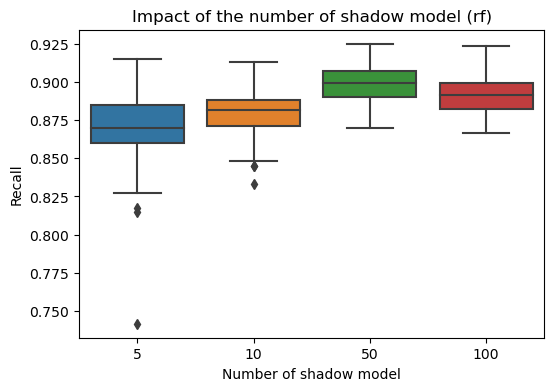

In [26]:
donnees=recup_data('report_shadow_model_','./MNIST/data', [5,10,20,50,100])
for i in range(len(donnees['Valeur'])):
    donnees['Valeur'][i]=donnees['Valeur'][i]['weighted avg']['recall']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('Impact of the number of shadow model (rf)')
plt.xlabel('Number of shadow model')
plt.ylabel('Recall')
plt.show()

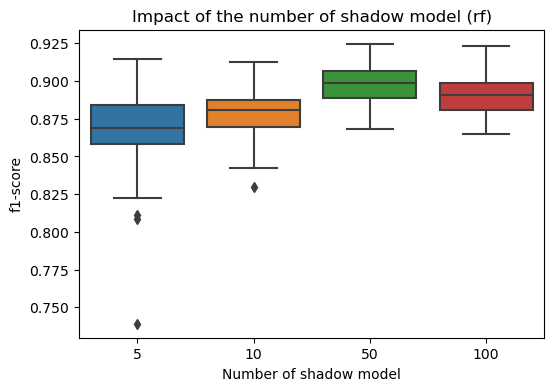

In [27]:
donnees=recup_data('report_shadow_model_', './MNIST/data', [5,10,20,50,100])
for i in range(len(donnees['Valeur'])):
    donnees['Valeur'][i]=donnees['Valeur'][i]['weighted avg']['f1-score']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('Impact of the number of shadow model (rf)')
plt.xlabel('Number of shadow model')
plt.ylabel('f1-score')
plt.show()

## Comparaison des modèles entre eux

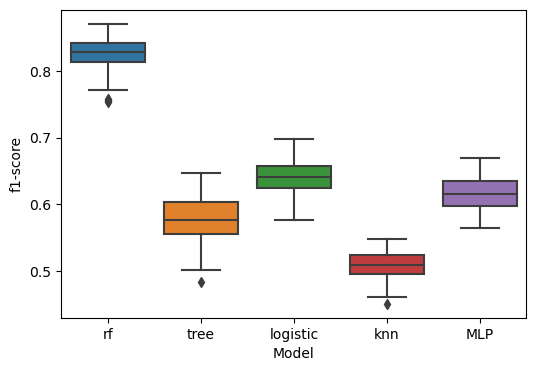

In [28]:
donnees=recup_data('report_test_model_', './MNIST/data', ['rf','tree','logistic','knn','MLP'])
for i in range(len(donnees['Valeur'])):
    donnees['Valeur'][i]=donnees['Valeur'][i]['weighted avg']['f1-score']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('')
plt.xlabel('Model')
plt.ylabel('f1-score')
plt.show()

## Overfitting

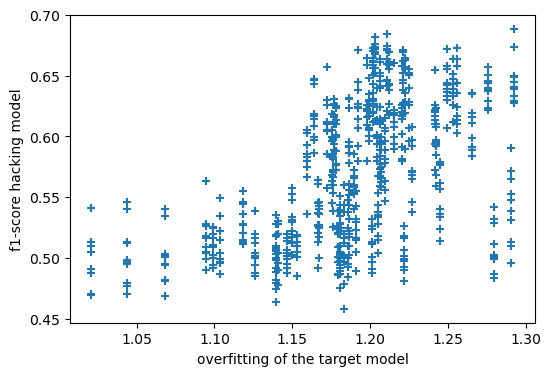

In [29]:
donnees=recup_data('report_of_logistic_', './overfitting/data', [0.0001,0.001,0.01,0.1,1.,10.,100.])
for i in range(len(donnees['Valeur'])):
    donnees['Groupe'][i]=donnees['Valeur'][i]['report_train_target']['weighted avg']['f1-score']/donnees['Valeur'][i]['report_test_target']['weighted avg']['f1-score']
    donnees['Valeur'][i]=donnees['Valeur'][i]['report_hack_model']['weighted avg']['f1-score']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
plt.scatter(x='Groupe', y='Valeur', data=df, marker = '+')
plt.title('')
plt.xlabel('overfitting of the target model')
plt.ylabel('f1-score hacking model')
plt.show()

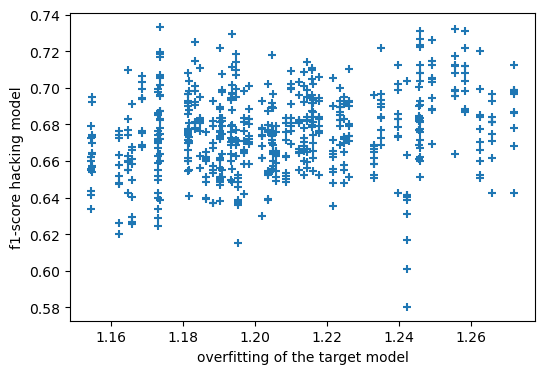

In [30]:
donnees=recup_data('report_of_MLP_', './overfitting/data', [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10])
for i in range(len(donnees['Valeur'])):
    donnees['Groupe'][i]=donnees['Valeur'][i]['report_train_target']['weighted avg']['f1-score']/donnees['Valeur'][i]['report_test_target']['weighted avg']['f1-score']
    donnees['Valeur'][i]=donnees['Valeur'][i]['report_hack_model']['weighted avg']['f1-score']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
plt.scatter(x='Groupe', y='Valeur', data=df, marker = '+')
plt.title('')
plt.xlabel('overfitting of the target model')
plt.ylabel('f1-score hacking model')
plt.show()

## Differential privacy

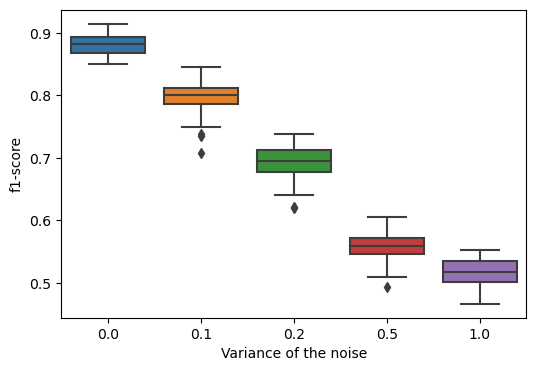

In [31]:
donnees=recup_data('report_privacy_', './differencial_privacy/data', [0.0,0.1,0.2,0.5, 1.0])
for i in range(len(donnees['Valeur'])):
    donnees['Valeur'][i]=donnees['Valeur'][i]['weighted avg']['f1-score']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('')
plt.xlabel('Variance of the noise')
plt.ylabel('f1-score')
plt.show()